# Figure5 Cell-cell interaction analysis

#  

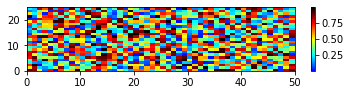

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(0,0,255), (0,255,255),(255,255,0),(255,0,0),(0,0,0)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

In [2]:
pval = pd.read_csv('./data/pvalues_lymph_mye.txt', sep='\t')
mean = pd.read_csv('./data/means_lymph_mye.txt', sep='\t')

In [4]:
pval_ = pval.drop(['interacting_pair','id_cp_interaction','partner_a','partner_b','ensembl_a',
                   'ensembl_b','source','secreted','is_integrin'],axis=1)
pval_.index = pval['interacting_pair']

pval_ = pval_.replace(0, 0.001)

print(min(pval_.apply(min)))
print(pval_.shape)
pval_.head()

0.001
(742, 100)


,CD4_Normal_CD4_Normal,CD4_Normal_CD4_Tumor,CD4_Normal_CD8_Normal,CD4_Normal_CD8_Tumor,CD4_Normal_NK_Normal,CD4_Normal_NK_Tumor,CD4_Normal_dc_Normal,CD4_Normal_dc_Tumor,CD4_Normal_mac_Normal,CD4_Normal_mac_Tumor,...,mac_Tumor_CD4_Normal,mac_Tumor_CD4_Tumor,mac_Tumor_CD8_Normal,mac_Tumor_CD8_Tumor,mac_Tumor_NK_Normal,mac_Tumor_NK_Tumor,mac_Tumor_dc_Normal,mac_Tumor_dc_Tumor,mac_Tumor_mac_Normal,mac_Tumor_mac_Tumor
interacting_pair,,,,,,,,,,,,,,,,,,,,,
CXCL12_ACKR3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CXCL11_ACKR3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CXCL12_CXCR3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CXCL11_CXCR3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CCL19_CXCR3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df = pval_.apply(np.log10)
df = abs(df)
df.head()

,CD4_Normal_CD4_Normal,CD4_Normal_CD4_Tumor,CD4_Normal_CD8_Normal,CD4_Normal_CD8_Tumor,CD4_Normal_NK_Normal,CD4_Normal_NK_Tumor,CD4_Normal_dc_Normal,CD4_Normal_dc_Tumor,CD4_Normal_mac_Normal,CD4_Normal_mac_Tumor,...,mac_Tumor_CD4_Normal,mac_Tumor_CD4_Tumor,mac_Tumor_CD8_Normal,mac_Tumor_CD8_Tumor,mac_Tumor_NK_Normal,mac_Tumor_NK_Tumor,mac_Tumor_dc_Normal,mac_Tumor_dc_Tumor,mac_Tumor_mac_Normal,mac_Tumor_mac_Tumor
interacting_pair,,,,,,,,,,,,,,,,,,,,,
CXCL12_ACKR3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CXCL11_ACKR3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CXCL12_CXCR3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CXCL11_CXCR3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCL19_CXCR3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df1 = df[df.apply(sum,axis=1) != 0]
df2 = df1.unstack().reset_index()
df2.rename(columns={'level_0': 'interaction',0: 'Value'}, inplace=True)
print("Min value : ", min(df2.Value))
print("Max value : ", max(df2.Value))
df2.head()

Min value :  0.0
Max value :  3.0


,interaction,interacting_pair,Value
0,CD4_Normal_CD4_Normal,CCL20_CCR6,0.0
1,CD4_Normal_CD4_Normal,CCL5_CCR1,0.0
2,CD4_Normal_CD4_Normal,CCL3_CCR1,0.0
3,CD4_Normal_CD4_Normal,SPN_ICAM1,0.0
4,CD4_Normal_CD4_Normal,HBEGF_CD44,0.0


In [7]:
mean_ = mean.drop(['interacting_pair','id_cp_interaction','partner_a','partner_b','ensembl_a','ensembl_b',
                   'source','secreted','is_integrin'], axis=1)
mean_.index = mean['interacting_pair']
mean_ = mean_[mean_.index.isin(df1.index)]
mean_.head()

,CD4_Normal_CD4_Normal,CD4_Normal_CD4_Tumor,CD4_Normal_CD8_Normal,CD4_Normal_CD8_Tumor,CD4_Normal_NK_Normal,CD4_Normal_NK_Tumor,CD4_Normal_dc_Normal,CD4_Normal_dc_Tumor,CD4_Normal_mac_Normal,CD4_Normal_mac_Tumor,...,mac_Tumor_CD4_Normal,mac_Tumor_CD4_Tumor,mac_Tumor_CD8_Normal,mac_Tumor_CD8_Tumor,mac_Tumor_NK_Normal,mac_Tumor_NK_Tumor,mac_Tumor_dc_Normal,mac_Tumor_dc_Tumor,mac_Tumor_mac_Normal,mac_Tumor_mac_Tumor
interacting_pair,,,,,,,,,,,,,,,,,,,,,
CCL20_CCR6,0.105,0.115,0.067,0.075,0.067,0.066,0.079,0.084,0.063,0.060,...,0.163,0.173,0.125,0.133,0.125,0.124,0.137,0.142,0.121,0.118
CCL5_CCR1,0.560,0.559,0.560,0.561,0.560,0.566,0.564,0.571,0.614,0.610,...,0.108,0.107,0.108,0.109,0.108,0.114,0.112,0.119,0.162,0.158
CCL3_CCR1,0.031,0.030,0.031,0.032,0.032,0.037,0.035,0.042,0.085,0.081,...,0.443,0.442,0.443,0.444,0.443,0.449,0.447,0.454,0.497,0.493
SPN_ICAM1,0.049,0.045,0.051,0.054,0.066,0.068,0.084,0.097,0.116,0.162,...,0.031,0.028,0.034,0.037,0.048,0.050,0.067,0.079,0.098,0.145
HBEGF_CD44,0.276,0.227,0.149,0.168,0.196,0.168,0.233,0.204,0.315,0.243,...,0.373,0.323,0.245,0.264,0.293,0.265,0.329,0.300,0.411,0.339


In [8]:
df3 = mean_.unstack().reset_index()
df3.rename(columns={'level_0': 'interaction',0: 'mean_value'}, inplace=True)

df3.mean_value = df3.mean_value.replace(0, 1)
df3.mean_value = df3.mean_value.apply(np.log2) 

print("Min value : ", min(df3.mean_value))
print("Max value : ", max(df3.mean_value))
df3.head()

Min value :  -9.965784284662087
Max value :  0.794103898559748


,interaction,interacting_pair,mean_value
0,CD4_Normal_CD4_Normal,CCL20_CCR6,-3.251539
1,CD4_Normal_CD4_Normal,CCL5_CCR1,-0.836501
2,CD4_Normal_CD4_Normal,CCL3_CCR1,-5.011588
3,CD4_Normal_CD4_Normal,SPN_ICAM1,-4.351074
4,CD4_Normal_CD4_Normal,HBEGF_CD44,-1.857260


In [9]:
bubu=[]

for i in list(set(df2.interaction)):
    if (i.split('_')[0]!=i.split('_')[2]) == True :
        if (i.split('_')[1]==i.split('_')[3]) == True :
            bubu += [i]
    
df4 = df2[df2.interaction.isin(bubu)]
df5 = df3[df3.interaction.isin(bubu)]


bububu = []

for i in list(set(df2.interacting_pair)):
    if 'complex' not in i :
        bububu += [i]
    
df4 = df4[df4.interacting_pair.isin(bububu)]
df5 = df5[df5.interacting_pair.isin(bububu)]

xticks_labels = [
    'CD4_Normal_CD8_Normal', 'CD4_Tumor_CD8_Tumor',
    'CD4_Normal_NK_Normal','CD4_Tumor_NK_Tumor',
    'CD4_Normal_dc_Normal','CD4_Tumor_dc_Tumor',
    'CD4_Normal_dc_Normal','CD4_Tumor_dc_Tumor',
    'CD4_Normal_mac_Normal','CD4_Tumor_mac_Tumor',
    'CD8_Normal_CD4_Normal','CD8_Tumor_CD4_Tumor',
    'CD8_Normal_NK_Normal','CD8_Tumor_NK_Tumor',
    'CD8_Normal_dc_Normal', 'CD8_Tumor_dc_Tumor',
    'CD8_Normal_mac_Normal','CD8_Tumor_mac_Tumor',
    'NK_Normal_CD4_Normal','NK_Tumor_CD4_Tumor',
    'NK_Normal_CD8_Normal','NK_Tumor_CD8_Tumor',
    'NK_Normal_dc_Normal','NK_Tumor_dc_Tumor',
    'NK_Normal_mac_Normal','NK_Tumor_mac_Tumor',
    'dc_Normal_CD4_Normal', 'dc_Tumor_CD4_Tumor',
    'dc_Normal_CD8_Normal', 'dc_Tumor_CD8_Tumor',
    'dc_Normal_NK_Normal', 'dc_Tumor_NK_Tumor',
    'dc_Normal_mac_Normal', 'dc_Tumor_mac_Tumor',
    'mac_Normal_CD4_Normal', 'mac_Tumor_CD4_Tumor',
    'mac_Normal_CD8_Normal','mac_Tumor_CD8_Tumor',
    'mac_Normal_NK_Normal', 'mac_Tumor_NK_Tumor',
    'mac_Normal_dc_Normal', 'mac_Tumor_dc_Tumor'
]

labels = df4.interaction

for i in range(len(xticks_labels)) :
    labels = labels.replace(xticks_labels[i], i)
    
df4['labelsort'] = labels
df5['labelsort'] = labels
    
df4 = df4.sort_values(by=['labelsort'])
df5 = df5.sort_values(by=['labelsort'])

fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Previous size: [6.0, 4.0]
Current size: [12, 12]


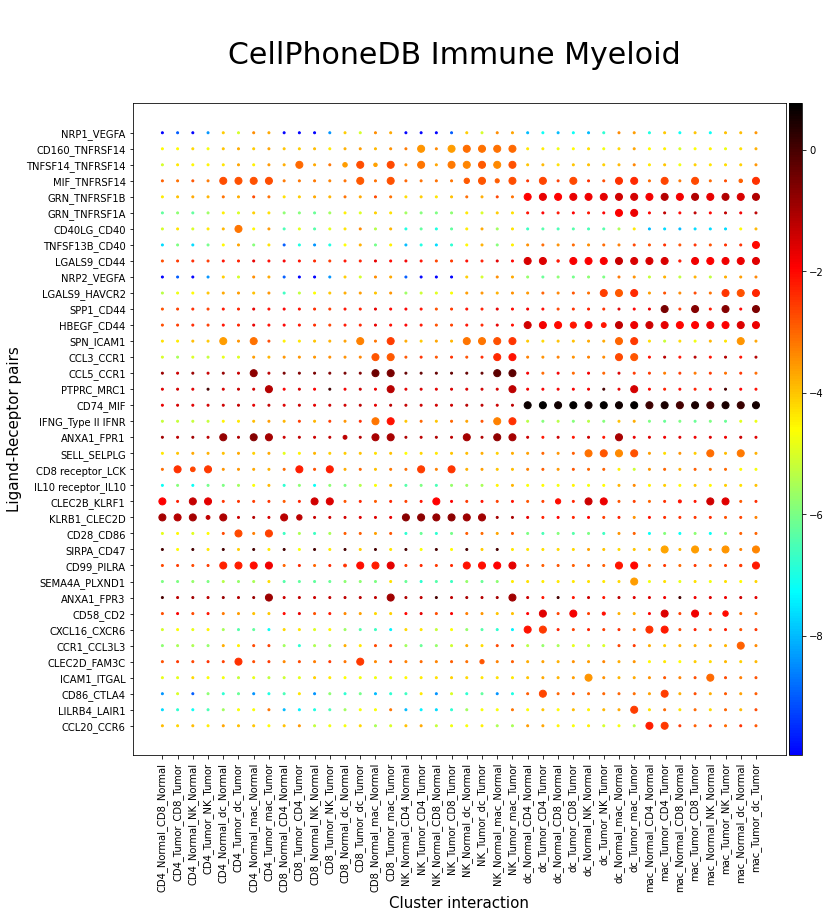

In [10]:
f, ax = plt.subplots()

points = ax.scatter(x = df4.interaction, y = df4.interacting_pair, s = df4.Value*15+4, c= df5.mean_value, 
                    cmap = my_cmap) 
plt.xticks(rotation=90)
plt.title('\nCellPhoneDB Immune Myeloid \n', fontsize=30)
plt.ylabel('Ligand-Receptor pairs', fontsize=15)
plt.xlabel('Cluster interaction', fontsize=15)
#ax.set_ylim(-2,mean_.shape[0]+1.5)
#ax.set_xlim(-1.5,mean_.shape[1]+1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
ax.grid(False)

f.colorbar(points, cax=cax)

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.15.4 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


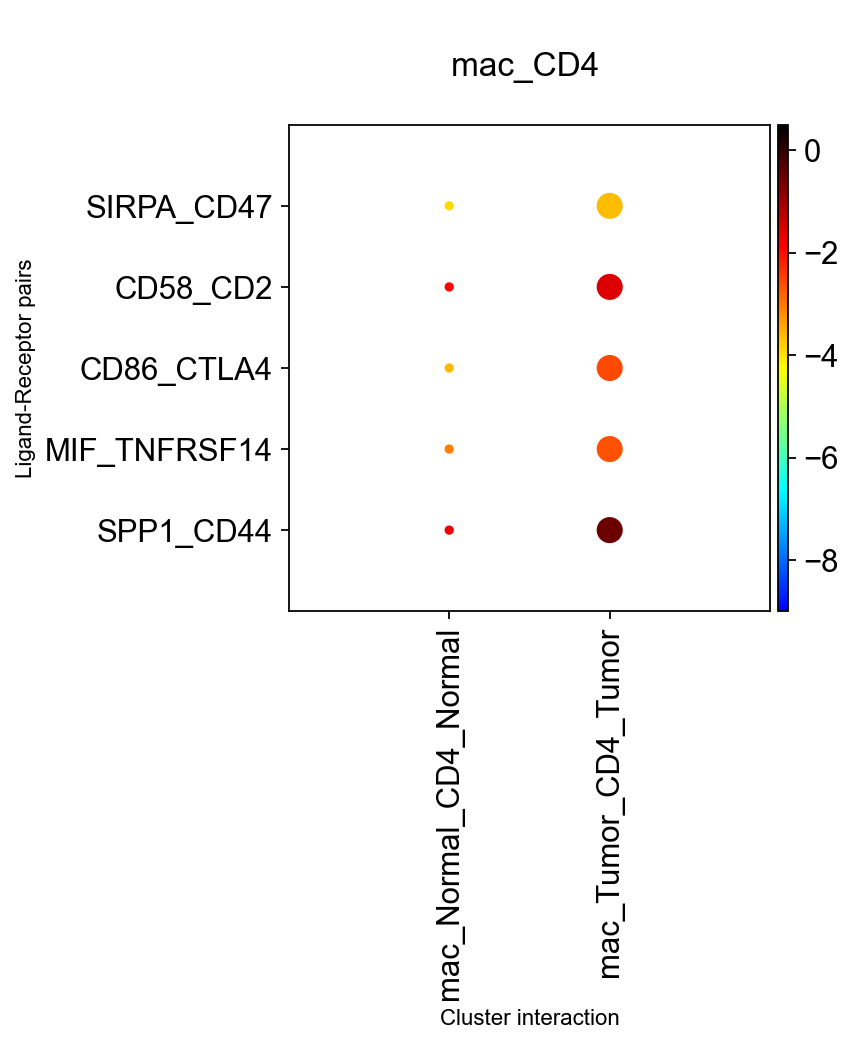

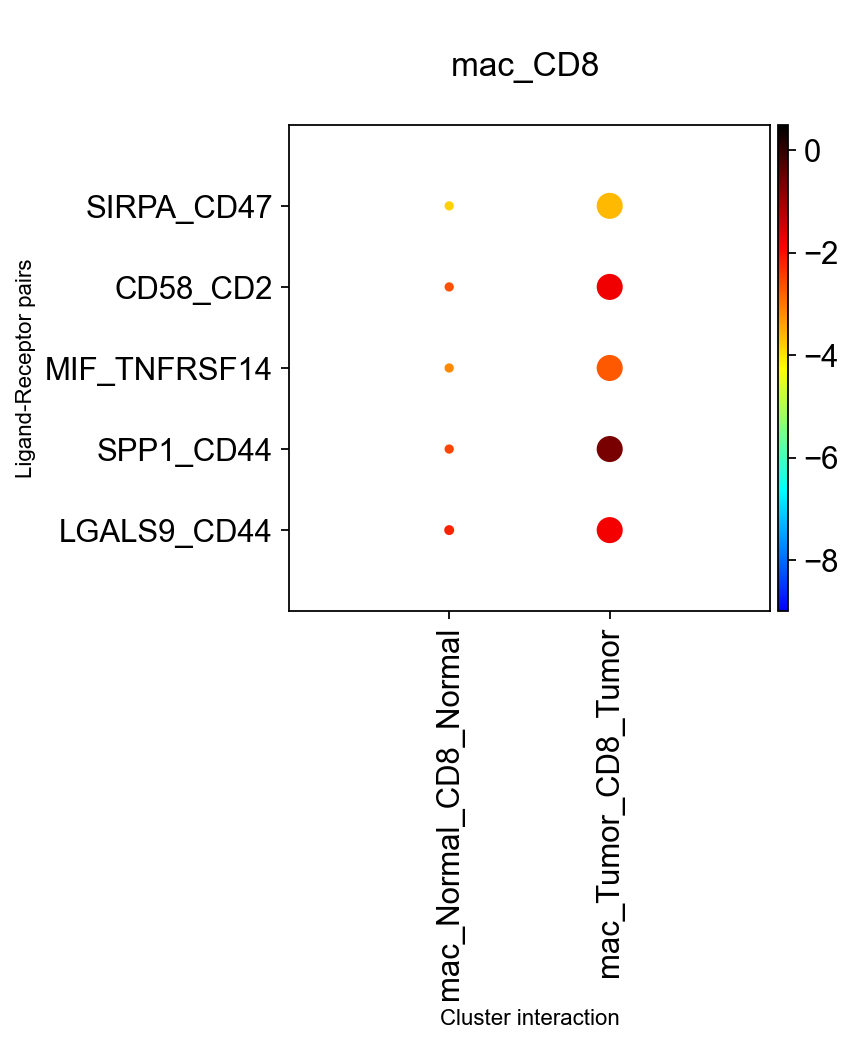

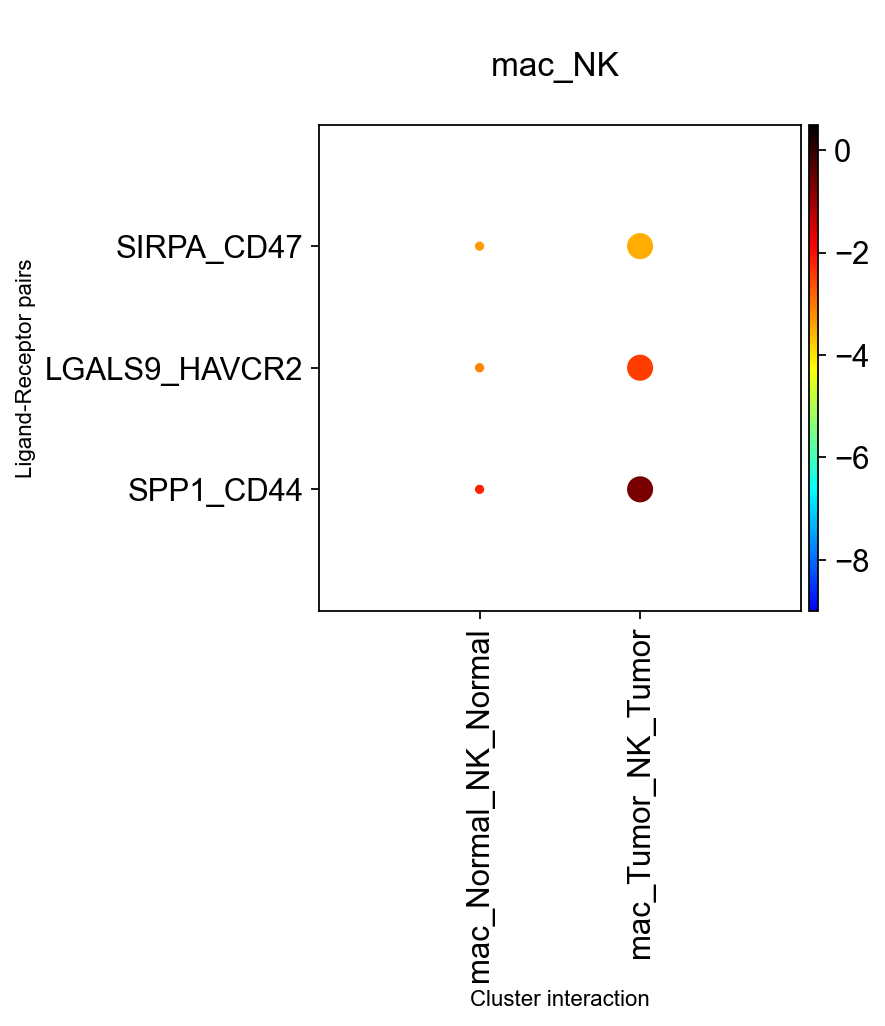

In [16]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
mye = sc.read("./data/myeloid_2.h5ad")
immune = sc.read("./data/immune.h5ad")


groups = [
    ['CD4_Normal_CD8_Normal', 'CD4_Tumor_CD8_Tumor'],
    ['CD4_Normal_NK_Normal','CD4_Tumor_NK_Tumor'],
    ['CD4_Normal_dc_Normal','CD4_Tumor_dc_Tumor'],
    ['CD4_Normal_mac_Normal','CD4_Tumor_mac_Tumor'],
    ['CD8_Normal_CD4_Normal','CD8_Tumor_CD4_Tumor'],
    ['CD8_Normal_NK_Normal','CD8_Tumor_NK_Tumor'],
    ['CD8_Normal_dc_Normal', 'CD8_Tumor_dc_Tumor'],
    ['CD8_Normal_mac_Normal','CD8_Tumor_mac_Tumor'],
    ['NK_Normal_CD4_Normal','NK_Tumor_CD4_Tumor'],
    ['NK_Normal_CD8_Normal','NK_Tumor_CD8_Tumor'],
    ['NK_Normal_dc_Normal','NK_Tumor_dc_Tumor'],
    ['NK_Normal_mac_Normal','NK_Tumor_mac_Tumor'],
    ['dc_Normal_CD4_Normal', 'dc_Tumor_CD4_Tumor'],
    ['dc_Normal_CD8_Normal', 'dc_Tumor_CD8_Tumor'],
    ['dc_Normal_NK_Normal', 'dc_Tumor_NK_Tumor'],
    ['dc_Normal_mac_Normal', 'dc_Tumor_mac_Tumor'],
    ['mac_Normal_CD4_Normal', 'mac_Tumor_CD4_Tumor'],
    ['mac_Normal_CD8_Normal','mac_Tumor_CD8_Tumor'],
    ['mac_Normal_NK_Normal', 'mac_Tumor_NK_Tumor'],
    ['mac_Normal_dc_Normal', 'mac_Tumor_dc_Tumor']
]

b =[]
for i in list(set(df.index)):
    if 'complex' not in i :
        b += [i]       
ddf = df[df.index.isin(b)]  
mmf = mean_[mean_.index.isin(b)]
mmf = mmf.replace(0, 1).apply(np.log2) 

#display(mmf.head())
#display(ddf.head())

interactions = []

groups2 = [
    ['mac_Normal_CD4_Normal', 'mac_Tumor_CD4_Tumor'],
    ['mac_Normal_CD8_Normal','mac_Tumor_CD8_Tumor'],
    ['mac_Normal_NK_Normal', 'mac_Tumor_NK_Tumor']
]

for i in groups :
    
    bu = pd.DataFrame();mu = pd.DataFrame()
    bu = ddf.loc[:,ddf.columns.isin(i)];mu = mmf.loc[:,ddf.columns.isin(i)]
    mu = mu[(bu.iloc[:,0]<=1)&(bu.iloc[:,1]>2)];bu = bu[(bu.iloc[:,0]<=1)&(bu.iloc[:,1]>2)]
    
    if bu.size<=0 : 
        continue
    
    for j in bu.index.tolist():
        interactions += [[j,str(i[0].split('_')[0]+'_'+i[0].split('_')[2])]]
    
    bu = bu[bu.apply(sum,axis=1) != 0]
    bu = bu.unstack().reset_index()
    bu.rename(columns={'level_0': 'interaction',0: 'Value'}, inplace=True)
       
    mu = mu.unstack().reset_index()
    mu.rename(columns={'level_0': 'interaction',0: 'mean_value'}, inplace=True)
    
    if(i in groups2) :
        f, ax = plt.subplots()
        points = ax.scatter(x=bu.interaction, 
                            y=bu.interacting_pair, 
                            s=bu.Value*35+10, 
                            c=mu.mean_value, 
                            cmap=my_cmap,
                            vmin=-9, vmax =0.5 ) 
        plt.xticks(rotation=90)
        plt.title('\n'+i[0].split('_')[0]+'_'+i[0].split('_')[2]+' \n', fontsize=15)
        plt.ylabel('Ligand-Receptor pairs', fontsize=10)
        plt.xlabel('Cluster interaction', fontsize=10)
        plt.grid(False)
        ax.set_ylim(-1,len(set(bu.interacting_pair)))
        ax.set_xlim(-1,len(set(bu.interaction)))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.05)
        f.colorbar(points, cax=cax)
        #f.savefig('./figures/'+i[0].split('_')[0]+'_'+i[0].split('_')[2]+".pdf", bbox_inches='tight')
    
  

,interaction,interacting_pair,count
TNFSF13B_CD40,TNFSF13B_CD40,mac_dc,1
CD40LG_CD40,CD40LG_CD40,CD4_dc,1
SEMA4A_PLXND1,SEMA4A_PLXND1,dc_mac,1
LILRB4_LAIR1,LILRB4_LAIR1,dc_mac,1
LGALS9_HAVCR2,LGALS9_HAVCR2,dc_NK,2
LGALS9_CD44,LGALS9_CD44,dc_CD8,2
CD86_CTLA4,CD86_CTLA4,dc_CD4,2
CD160_TNFRSF14,CD160_TNFRSF14,NK_CD4,2
SPN_ICAM1,SPN_ICAM1,CD8_dc,2
CD28_CD86,CD28_CD86,CD4_dc,2


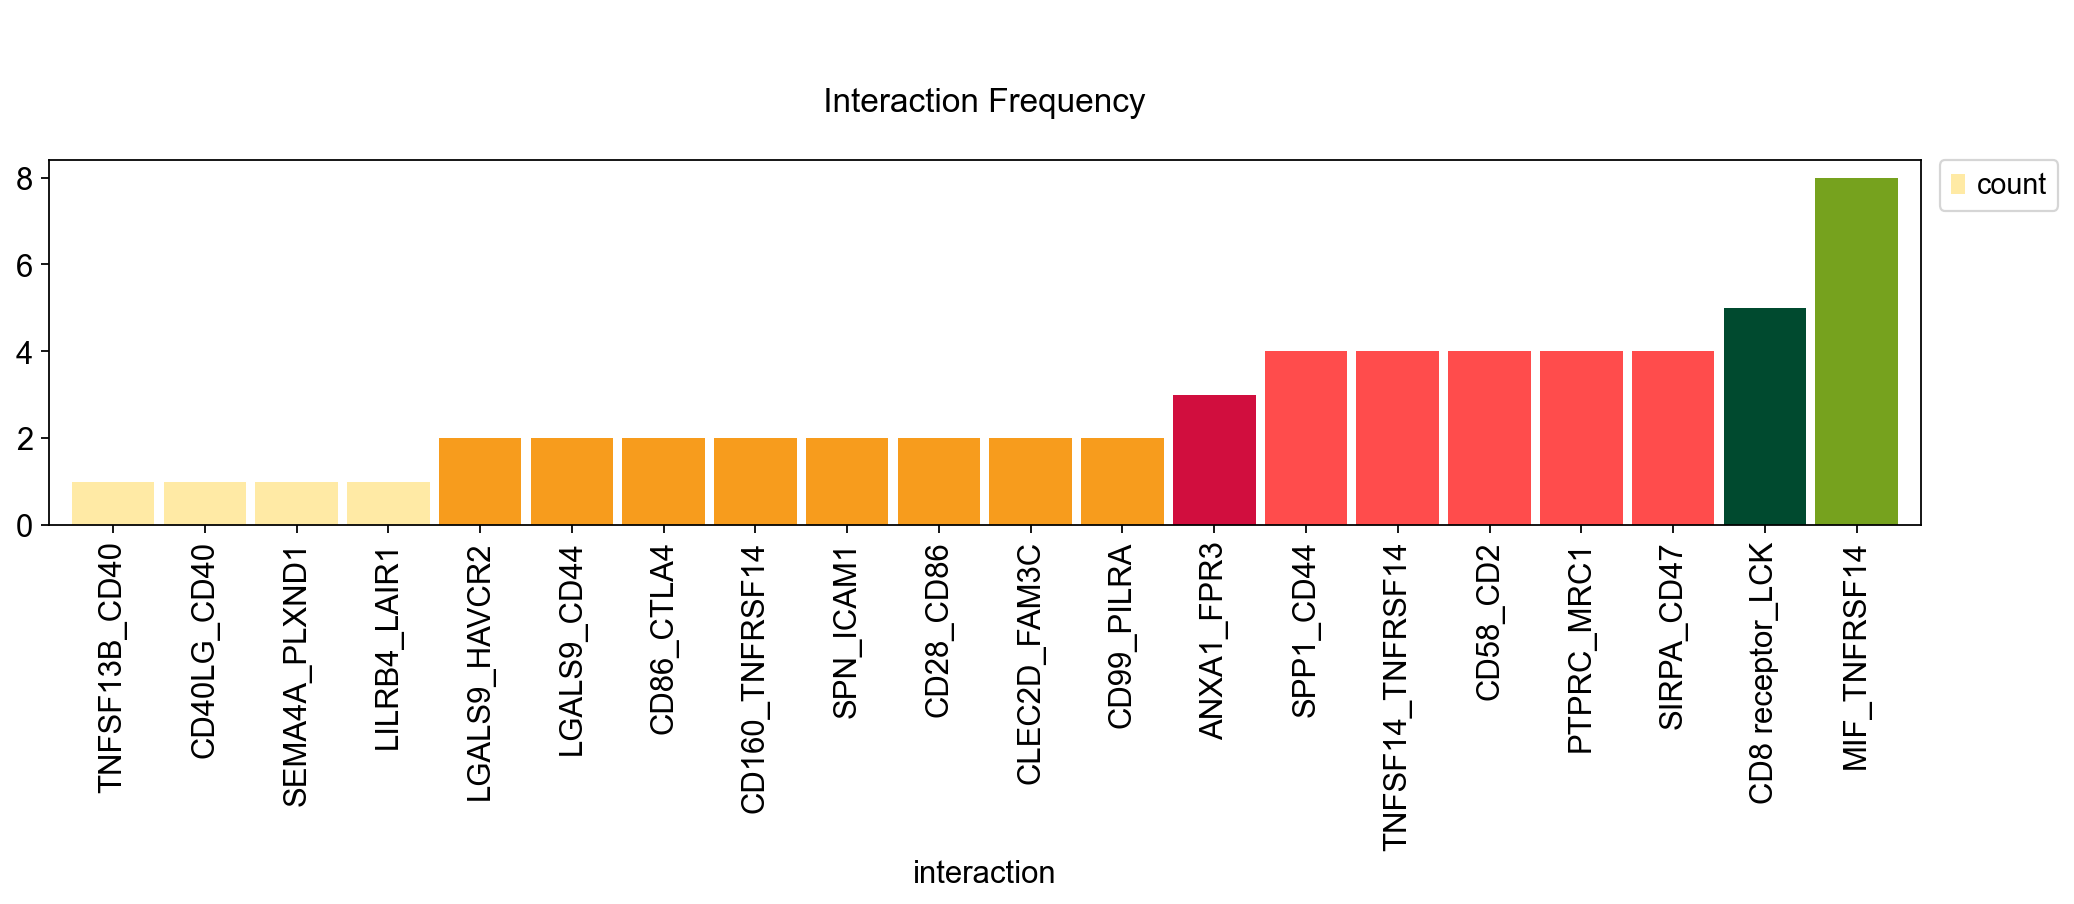

In [44]:
interaction2 = pd.DataFrame(interactions,columns=['interaction','interacting_pair'])
interaction2.index = list(interaction2.interaction)

cc = interaction2.groupby(['interaction']).count()
interaction2 = interaction2.drop_duplicates(['interaction'])
interaction2['count'] = cc

interaction2 = interaction2.sort_values(by=['interacting_pair']).sort_values(by=['count'])

display(interaction2)

interaction2['color'] = interaction2['count']

#color = ['#d8d8d8','#ffe119','#e6194B','#ff4949','#5c7658','#004a2f']
color = ['#ffeaa5','#f79c1d','#d10e3e','#ff4c4c','#004a2f','#76a21e']
ccc = list(set(interaction2['count']))
for i in ccc:  
    interaction2['color'] = interaction2['color'].replace(i, color[ccc.index(i)])

ax = interaction2.plot(kind='bar', x='interaction', y='count', color=interaction2.color, 
                       pval = pd.read_csv('./out/pvalues.txt', sep='\t')
mean = pd.read_csv('./out/means.txt', sep='\t')figsize=[15,3] , width=0.9)
plt.grid(False)
plt.title('\n\n Interaction Frequency \n', fontsize=15)
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('./figures/immune_mye_interactionfrequency.pdf', bbox_inches='tight')

In [46]:
pval = pd.read_csv('./data/pvalues_treg_tam.txt', sep='\t')
mean = pd.read_csv('./data/means_treg_tam.txt', sep='\t')

pval_ = pval.drop(['interacting_pair','id_cp_interaction','partner_a','partner_b','ensembl_a','ensembl_b','source',
                   'secreted','is_integrin'],axis=1)
pval_.index = pval['interacting_pair']
pval_ = pval_.replace(0, 0.001)
df = pval_.apply(np.log10)
df = abs(df)

pval_ = df[df.apply(sum,axis=1) != 0]
df2 = pval_.unstack().reset_index()
df2.rename(columns={'level_0': 'interaction',0: 'Value'}, inplace=True)

mean_ = mean.drop(['interacting_pair','id_cp_interaction','partner_a','partner_b','ensembl_a','ensembl_b',
                   'source','secreted','is_integrin'], axis=1)
mean_.index = mean['interacting_pair']
mean_ = mean_[mean_.index.isin(pval_.index)]

df3 = mean_.unstack().reset_index()
df3.rename(columns={'level_0': 'interaction',0: 'mean_value'}, inplace=True)

df3.mean_value = df3.mean_value.replace(0, 1)
df3.mean_value = df3.mean_value.apply(np.log2) 


In [47]:
df2['mean_val'] = df3['mean_value'] 
bububu = []
for i in list(set(df2.interacting_pair)):
    if 'complex' not in i :
        bububu += [i]

xticks_labels = ['TAM.FOLR2_treg','TAM.SPP1_treg']
df_ = df2[df2.interaction.isin(xticks_labels) & df2.interacting_pair.isin(bububu)]

ln=[]
for i in df_.interacting_pair :
    if (df_[df_.interacting_pair==i].sum().Value > 0 ) :
        ln += [i]

df_ = df_[df_.interacting_pair.isin(ln)]     

df_.head()

,interaction,interacting_pair,Value,mean_val
1541,TAM.FOLR2_treg,CXCL12_CXCR3,3.000000,-2.988504
1542,TAM.FOLR2_treg,CCL20_CXCR3,3.000000,-2.426625
1543,TAM.FOLR2_treg,CXCL10_CXCR3,3.000000,-2.514573
1544,TAM.FOLR2_treg,CXCL9_CXCR3,3.000000,-2.573467
1545,TAM.FOLR2_treg,CXCL12_CXCR4,1.823909,-0.514573


Previous size: [4.0, 8.0]
Current size: [4, 8]


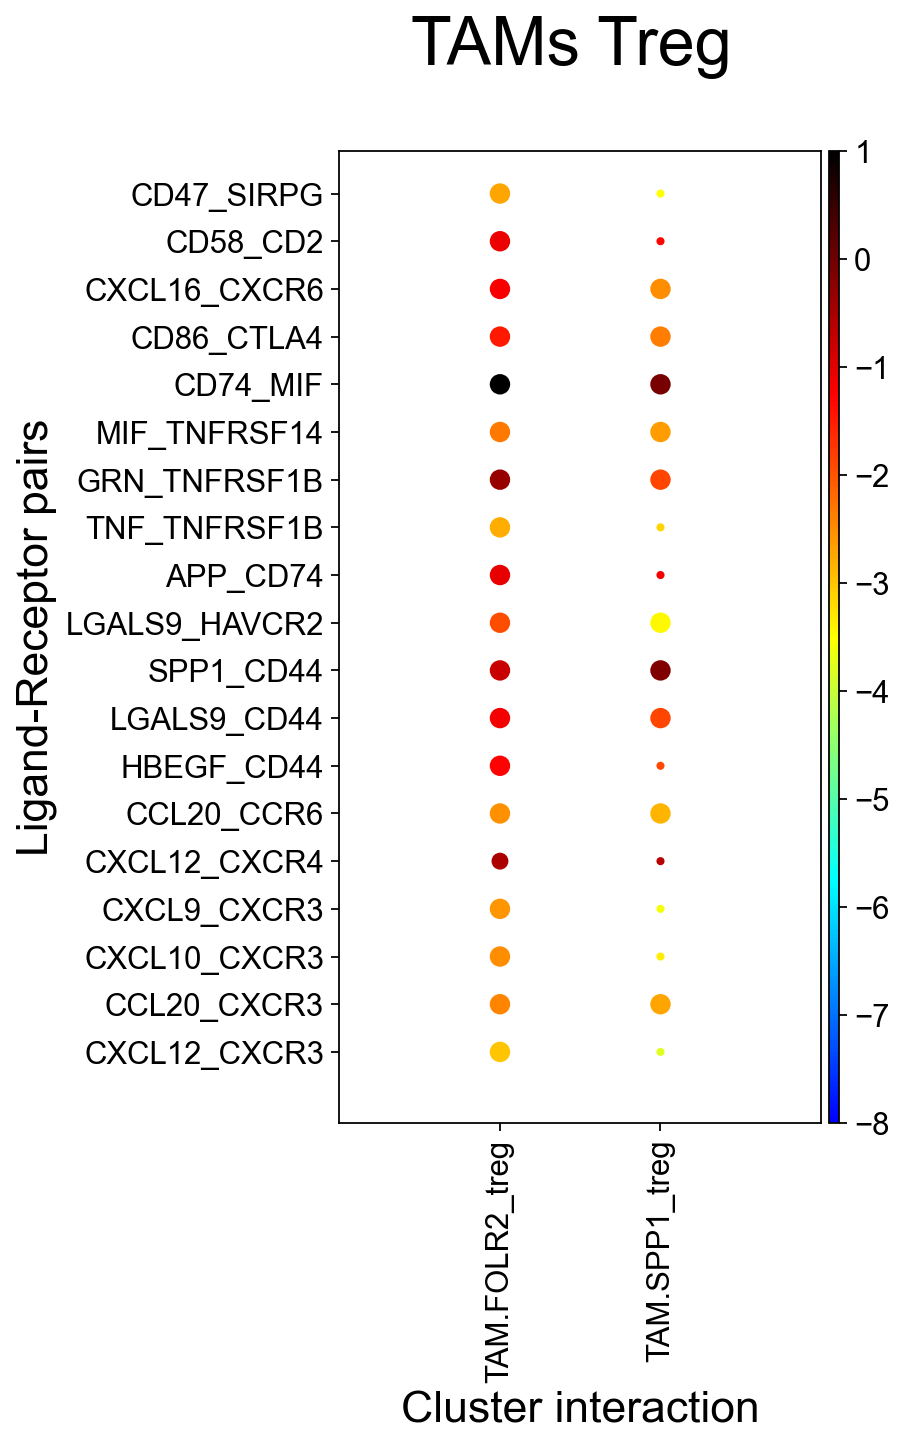

In [50]:
import matplotlib
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 4
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

f, ax = plt.subplots()
    
points = ax.scatter(y = df_.interacting_pair, x = df_.interaction, s = df_.Value*20+7, c= df_.mean_val, 
                    cmap = my_cmap, vmax=1, vmin=-8)# 
plt.xticks(rotation=90)
plt.title('TAMs Treg \n', fontsize=30)
plt.ylabel('Ligand-Receptor pairs', fontsize=20)
plt.xlabel('Cluster interaction', fontsize=20)
ax.set_ylim(-1.5,)
ax.set_xlim(-1,2)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)

f.colorbar(points, cax=cax)

In [52]:
adata.obs.CellType

index
AAGTCTGTCATCTGCC-1                 DC2
ACTTTCACAGTCTTCC-1                 pDC
ACTTTCAGTCCCTACT-1                 FLM
CAACTAGCACCCTATC-1                 DC2
CCTTCCCTCGCCTGTT-1           Monocytes
                            ...       
TGAGGGACATCACGAT-62    Fetal Monocytes
TGGCGCAAGCCCAGCT-62          Fetal DC2
TGGTTCCCAACACCCG-62    Fetal Monocytes
TTCTTAGTCGTCGTTC-62    Fetal Monocytes
TTCTTAGTCTCTAAGG-62    Fetal Monocytes
Name: CellType, Length: 9307, dtype: category
Categories (12, object): [DC1, DC2, FLM, Fetal CMP, ..., TAM1, TAM2, TAM3, pDC]

Trying to set attribute `.obs` of view, copying.


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.15.4 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


... storing 'CellType' as categorical


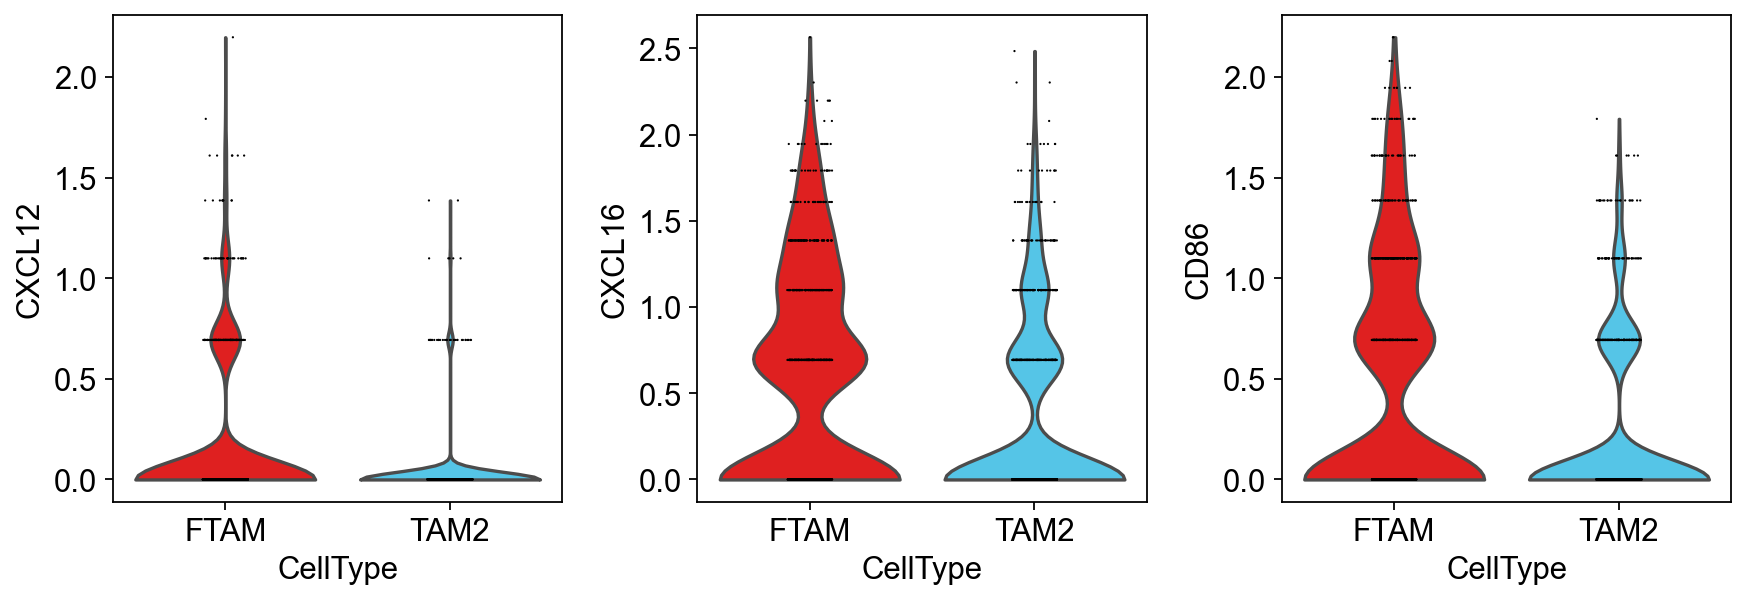

Trying to set attribute `.obs` of view, copying.
... storing 'CellType' as categorical


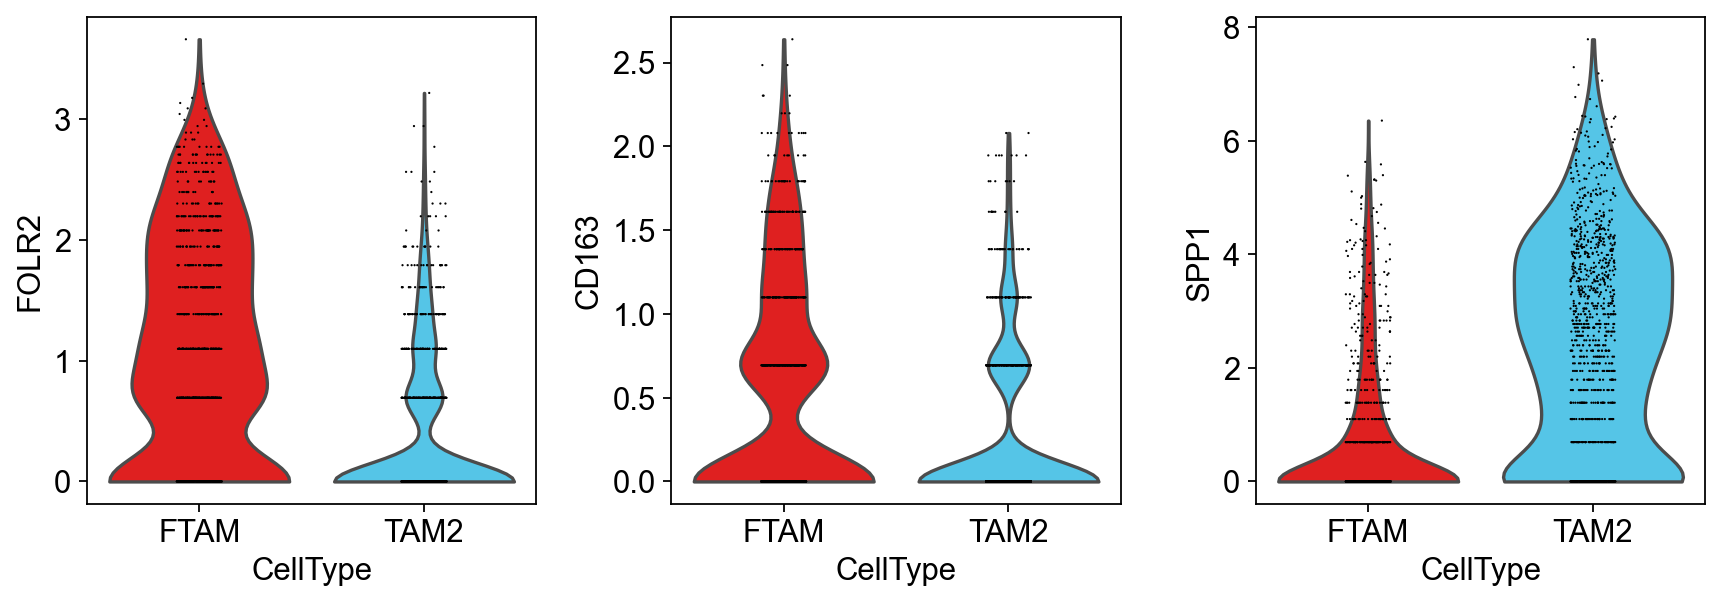

In [65]:
import numpy as np
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
adata = sc.read("./data/mye_wo_b.h5ad")
di = {
      '0': "TAM2",
      '1': "DC2", 
      '2': "Monocytes",
      '3': "FTAM",
      '4': "Fetal Monocytes",
      '5': "Fetal DC2",
      '6': "FLM",
      '7': "DC1",
      '8': "TAM3",
      '9': "TAM1",
      '10': "DC2",
      '11': "pDC", 
      '12': "Megakaryocytes",
      '13': "Fetal CMP"
     }

adata.obs['CellType'] = adata.obs.louvain
adata.obs = adata.obs.replace({"CellType": di})

new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

sc.pl.violin(adata[adata.obs.loc[adata.obs.CellType.isin(['FTAM','TAM2'])].index.tolist(), ],
             ['CXCL12','CXCL16','CD86'], groupby='CellType', palette=['#ff0000','#3dd2ff'], stripplot=True)

sc.pl.violin(adata[adata.obs.loc[adata.obs.CellType.isin(['FTAM','TAM2'])].index.tolist(), ],
             ['FOLR2','CD163','SPP1'], groupby='CellType', palette=['#ff0000','#3dd2ff'], stripplot=True)